<a href="https://colab.research.google.com/github/Jkanishkha0305/Detection-of-Covid-19-from-Chest-Xray-using-Custom-CNN-and-Transfer-Learning/blob/main/Hybrid_Learning_and_Comparative_study_for_Covid_19_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creating a Hybrid Learning Model (CNN+LSTM) and comparing the model performance with modified Xception, MobileNet, VGG19 for detection of Covid-19 form Chest X-ray images

In [ ]:
#mounting the drive so that it will be easier to read datasets and no need to upload in the colab everytime
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing the requiredlibraries 

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'drive/MyDrive/Colab_Assignments/ML/CovidDataset/Train'
valid_path = 'drive/MyDrive/Colab_Assignments/ML/CovidDataset/Test'


In [ ]:
import os

# Replace 'path_to_subdirectory' with your subdirectory path
path = '/content/drive/MyDrive/Colab_Assignments/ML/CovidDataset/Test/Normal'

# Initialize counters
num_jpg = 0
num_png = 0
num_jpeg = 0

# Loop over all files in the subdirectory
for file in os.listdir(path):
    if file.endswith('.jpg'):
        num_jpg += 1
    elif file.endswith('.png'):
        num_png += 1
    elif file.endswith('.jpeg'):
        num_png += 1

print(f'Total number of .jpg files: {num_jpg}')
print(f'Total number of .png files: {num_png}')
print(f'Total number of .png files: {num_jpeg}')

Total number of .jpg files: 0
Total number of .png files: 30
Total number of .png files: 0


In [ ]:
a = 151
b = 112
c = 30
d = 30

Creating a CNN Model from Scratch

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
### Create Model architecture from scratch using CNN (5 layers)
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# We use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Here we are augmenting the images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Creating trainset with image size of dimension (224,224)
training_set = train_datagen.flow_from_directory('drive/MyDrive/Colab_Assignments/ML/CovidDataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 224 images belonging to 2 classes.


In [ ]:
# Creating testset with image size of dimension (224,224)
test_set = test_datagen.flow_from_directory('drive/MyDrive/Colab_Assignments/ML/CovidDataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 60 images belonging to 2 classes.


In [ ]:
# fit the model
# Training the model with 50 epochs
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
7/7 [==============================] - 13s 2s/step - loss: 0.0386 - accuracy: 0.9866 - val_loss: 0.2057 - val_accuracy: 0.9667
Epoch 2/50
7/7 [==============================] - 11s 2s/step - loss: 0.0232 - accuracy: 0.9955 - val_loss: 0.0950 - val_accuracy: 0.9667
Epoch 3/50
7/7 [==============================] - 11s 2s/step - loss: 0.0437 - accuracy: 0.9866 - val_loss: 0.0838 - val_accuracy: 0.9667
Epoch 4/50
7/7 [==============================] - 11s 2s/step - loss: 0.0643 - accuracy: 0.9777 - val_loss: 0.1177 - val_accuracy: 0.9667
Epoch 5/50
7/7 [==============================] - 13s 2s/step - loss: 0.0167 - accuracy: 0.9911 - val_loss: 0.0491 - val_accuracy: 0.9667
Epoch 6/50
7/7 [==============================] - 12s 2s/step - loss: 0.0171 - accuracy: 0.9955 - val_loss: 0.1677 - val_accuracy: 0.9667
Epoch 7/50
7/7 [==============================] - 11s 2s/step - loss: 0.0098 - accuracy: 0.9955 - val_loss: 0.1092 - val_accuracy: 0.9667
Epoch 8/50
7/7 [==================

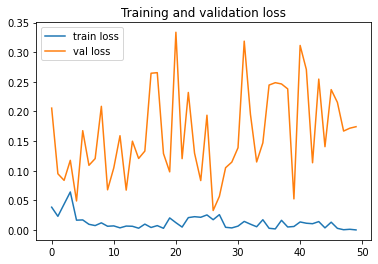

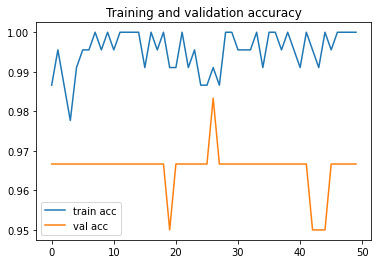

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
loss,accuracy = model.evaluate(test_set)

2/2 [==============================] - 2s 1s/step - loss: 0.1743 - accuracy: 0.9667


In [ ]:
print("test accuracy: "+ str(accuracy*100))
print("test loss: "+ str(loss*100))

test accuracy: 96.66666388511658
test loss: 17.43311583995819


In [ ]:
# save the model as a h5 file

from tensorflow.keras.models import load_model

model.save('CNN.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[7.4955139e-08, 9.9999988e-01],
       [5.7730642e-07, 9.9999940e-01],
       [9.9845231e-01, 1.5476849e-03],
       [9.7518116e-10, 1.0000000e+00],
       [2.5203661e-07, 9.9999976e-01],
       [1.0000000e+00, 3.8444327e-08],
       [3.6477243e-07, 9.9999964e-01],
       [1.0000000e+00, 4.2068653e-08],
       [1.0000000e+00, 2.3409907e-08],
       [8.6694610e-07, 9.9999917e-01],
       [2.2939057e-06, 9.9999774e-01],
       [1.0000000e+00, 1.0420802e-09],
       [9.9998343e-01, 1.6559194e-05],
       [1.0000000e+00, 2.0631850e-11],
       [1.0000000e+00, 3.8370501e-11],
       [2.2686978e-08, 1.0000000e+00],
       [1.0000000e+00, 2.4724470e-08],
       [1.0000000e+00, 5.6925419e-11],
       [2.3199301e-04, 9.9976796e-01],
       [1.0408254e-08, 1.0000000e+00],
       [3.2220280e-06, 9.9999678e-01],
       [1.0000000e+00, 4.9784682e-10],
       [8.2764348e-07, 9.9999917e-01],
       [1.0000000e+00, 1.2148640e-10],
       [1.0000000e+00, 4.2049731e-15],
       [1.5546560e-10, 1.

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('CNN.h5')

In [ ]:
#img=image.load_img('drive/MyDrive/Colab_Assignments/ML/CovidDataset/Test/Normal/NORMAL2-IM-0894-0001.jpeg',target_size=(224,224))

img=image.load_img('drive/MyDrive/Colab_Assignments/ML/CovidDataset/Test/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg',target_size=(224,224))


In [ ]:
x=image.img_to_array(img)
x

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ...,

       [[37., 37., 37.],
        [32., 32., 32.],
        [35., 35., 35.],
        ...,
        [55., 55., 55.],
        [43., 43., 43.],
        [55., 55., 55.]],

       [[32., 32., 32.],
        [30., 30., 30.],
        [35., 35., 35.],
        ...,
        [55., 55., 55.],
        [43., 43., 43.],
        [55., 55., 55.]],

       [[30., 30., 30.],
        [27., 27., 27.],
        [32., 32., 32.],
        ...,
        [55., 55., 55.],
        [43., 43., 43.],
        [55., 55., 55.]]

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("COVID-19 Negative")
else:
    print("COVID-19 Positive")

COVID-19 Positive


Creating a VGG19 Model

In [ ]:
vgg19 = VGG19(input_shape = IMAGE_SIZE + [3],weights = 'imagenet',include_top = False)

80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
# don't train existing weights

for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('drive/MyDrive/Colab_Assignments/ML/CovidDataset/Train/*')

In [ ]:
folders

['drive/MyDrive/Colab_Assignments/ML/CovidDataset/Train/Covid',
 'drive/MyDrive/Colab_Assignments/ML/CovidDataset/Train/Normal']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [ ]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [ ]:
vgg19.input_shape()

TypeError: ignored

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

ValueError: ignored

In [ ]:
# view the structure of the model
model.summary()

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 13 steps, validate for 5 steps
Epoch 1/50
13/13 [==============================] - 6s 490ms/step - loss: 1.4529 - accuracy: 0.5048 - val_loss: 0.9426 - val_accuracy: 0.4179
Epoch 2/50
13/13 [==============================] - 6s 498ms/step - loss: 0.7403 - accuracy: 0.6010 - val_loss: 0.6418 - val_accuracy: 0.6791
Epoch 3/50
13/13 [==============================] - 6s 495ms/step - loss: 0.5256 - accuracy: 0.7524 - val_loss: 0.9822 - val_accuracy: 0.5224
Epoch 4/50
13/13 [==============================] - 6s 459ms/step - loss: 0.4426 - accuracy: 0.7788 - val_loss: 0.4205 - val_accuracy: 0.7761
Epoch 5/50
13/13 [==============================] - 6s 466ms/step - loss: 0.3296 - accuracy: 0.8630 - val_loss: 0.5563 - val_accuracy: 0.7015
Epoch 6/50
13/13 [==============================] - 6s 473ms/step - loss: 0.3186 - accuracy: 0.8654 - val_loss: 0.3651 - val_accuracy: 0.8358
Epoch 7/50
13/13 [==============================] - 6s 46

KeyboardInterrupt: 

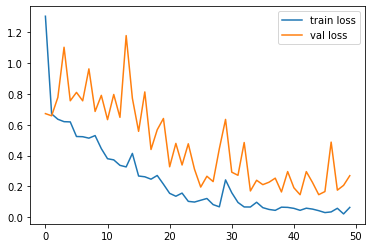

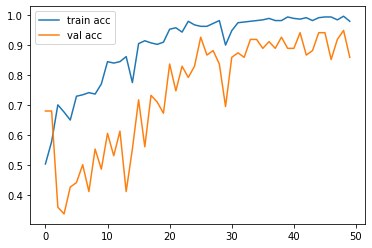

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
loss,accuracy = model.evaluate(test_set)

In [ ]:
print("test accuracy: "+ str(accuracy*100))
print("test loss: "+ str(loss*100))

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[9.99876857e-01, 1.23175341e-04],
       [9.99977112e-01, 2.29190919e-05],
       [7.58346558e-01, 2.41653457e-01],
       [9.99925494e-01, 7.45595753e-05],
       [9.90784764e-01, 9.21520963e-03],
       [9.12076458e-02, 9.08792377e-01],
       [2.70295113e-01, 7.29704857e-01],
       [3.21944878e-02, 9.67805505e-01],
       [9.62613881e-01, 3.73861678e-02],
       [5.13265312e-01, 4.86734688e-01],
       [9.87143576e-01, 1.28563549e-02],
       [9.97780263e-01, 2.21971911e-03],
       [9.32238042e-01, 6.77619576e-02],
       [9.21115577e-01, 7.88843632e-02],
       [3.17853913e-02, 9.68214571e-01],
       [1.00000000e+00, 9.47071488e-09],
       [2.65438944e-01, 7.34561086e-01],
       [9.99419808e-01, 5.80202264e-04],
       [9.40651655e-01, 5.93483634e-02],
       [9.85742450e-01, 1.42575456e-02],
       [9.99954581e-01, 4.54339461e-05],
       [9.99656916e-01, 3.43117106e-04],
       [5.88945560e-02, 9.41105425e-01],
       [9.99902725e-01, 9.72729686e-05],
       [7.317669

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1], dtype=int64)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19.h5')

In [ ]:
#img=image.load_img('drive/MyDrive/Colab_Assignments/ML/CovidDataset/Test/Normal/NORMAL2-IM-0894-0001.jpeg',target_size=(224,224))

img=image.load_img('drive/MyDrive/Colab_Assignments/ML/CovidDataset/Test/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg',target_size=(224,224))


In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.01155142, 0.98844856]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("COVID-19 Negative")
else:
    print("COVID-19 Positive")

Uninfected


In [ ]:
len(folders)

2

#Testing 

In [ ]:
# We use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Here we are augmenting the images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:

# Creating trainset with image size of dimension (224,224)
training_set = train_datagen.flow_from_directory('drive/MyDrive/Colab_Assignments/ML/CovidDataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 224 images belonging to 2 classes.


In [ ]:
# Creating testset with image size of dimension (224,224)
test_set = test_datagen.flow_from_directory('drive/MyDrive/Colab_Assignments/ML/CovidDataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 60 images belonging to 2 classes.


VGG19

80134624/80134624 [==============================] - 1s 0us/step


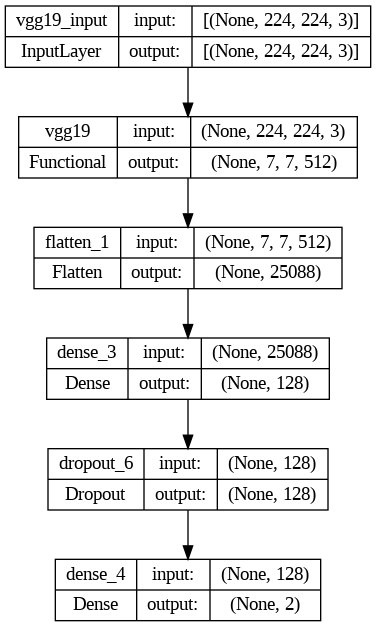

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model

vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# x = vgg19.output
# x = Flatten()(x)
# #x = Dense(512, activation='relu')(x)
# #x = Dropout(0.4)(x)
# #x = Dense(256, activation='relu')(x)
# #x = Dropout(0.4)(x)
# x = Dense(128, activation='relu')(x)
# x = Dropout(0.2)(x)
# predictions = Dense(2, activation='softmax')(x)

#model1 = Model(inputs=vgg19.input, outputs=predictions)

CNN_vgg19 = Sequential()
#CNN_mobilenet.add(BatchNormalization(input_shape = (224, 224, 3)))
CNN_vgg19.add(vgg19)
CNN_vgg19.add(Flatten())
CNN_vgg19.add(Dense(128, activation = 'relu'))
CNN_vgg19.add(Dropout(0.2))
CNN_vgg19.add(Dense(2, activation = 'softmax'))

plot_model(CNN_vgg19, to_file = 'vgg19mod.png', show_layer_names = True , show_shapes = True)

In [ ]:
CNN_vgg19.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
import time

start_time = time.time()

# fit the model
# Training the model with 50 epochs
r = CNN_vgg19.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

end_time = time.time()
time_taken = end_time - start_time

print(f"Total time taken for training: {time_taken} seconds")

Epoch 1/50
7/7 [==============================] - 38s 3s/step - loss: 7.7805 - accuracy: 0.4955 - val_loss: 3.9305 - val_accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 15s 2s/step - loss: 1.2665 - accuracy: 0.4911 - val_loss: 0.7544 - val_accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - 13s 2s/step - loss: 0.7401 - accuracy: 0.4375 - val_loss: 0.7135 - val_accuracy: 0.5000
Epoch 4/50
7/7 [==============================] - 21s 3s/step - loss: 0.7182 - accuracy: 0.4821 - val_loss: 0.6982 - val_accuracy: 0.5000
Epoch 5/50
7/7 [==============================] - 14s 2s/step - loss: 0.7024 - accuracy: 0.5000 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 6/50
7/7 [==============================] - 13s 2s/step - loss: 0.7281 - accuracy: 0.4643 - val_loss: 0.6992 - val_accuracy: 0.5000
Epoch 7/50
7/7 [==============================] - 15s 2s/step - loss: 0.7206 - accuracy: 0.4911 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 8/50
7/7 [==================

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# predict the output of test set
predictions = model1.predict(x_test)
predictions = np.argmax(predictions, axis=-1)
y_test = np.argmax(y_test, axis=-1)

# calculate the evaluation metrics
f1 = f1_score(y_test, predictions)
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

# print the evaluation metrics
print("F1-score: ", f1)
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", recall)


In [ ]:
##################################
import numpy as np

# Generate predictions for test set
y_pred = CNN_vgg19.predict(test_set)

# Convert predicted probabilities to binary class labels
y_pred = np.argmax(y_pred, axis=1)

# Get true labels
y_true = test_set.classes

# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1score = f1_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1score)
####################################

In [ ]:
# train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# evaluate the model
test_loss, test_acc, test_recall, test_precision, test_f1 = model.evaluate(x_test, y_test, verbose=2)

# print the evaluation metrics
print("Test loss: ", test_loss)
print("Test accuracy: ", test_acc)
print("Test recall: ", test_recall)
print("Test precision: ", test_precision)
print("Test F1-score: ", test_f1)

In [ ]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.legend()

plt.show()

In [ ]:
score_inc = r.evaluate(test_set)
print("Test Loss:", score_inc[0])
print("Test Accuracy:", score_inc[1])

In [ ]:
y_pred_inc = CNN_inc.predict(test_set)
y_pred_inc = np.round(y_pred_inc)

recall_inc = recall_score(y_test, y_pred_inc)
precision_inc = precision_score(y_test, y_pred_inc)
f1_inc = f1_score(y_test, y_pred_inc)
roc_inc = roc_auc_score(y_test, y_pred_inc)

In [ ]:
print(classification_report(y_test, y_pred_inc))

In [ ]:
plt.figure(figsize = (6, 4))

sns.heatmap(confusion_matrix(y_test, y_pred_inc),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

MobileNet 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, SpatialDropout2D

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model


In [ ]:
from keras.applications.mobilenet import MobileNet
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.models import Model

mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = mobilenet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense((2), activation='softmax')(x)

model = Model(inputs=mobilenet.input, outputs=predictions)


17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
CNN_base_mobilenet = MobileNet(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [ ]:
for layer in CNN_base_mobilenet.layers:
    layer.trainable = False

In [ ]:
CNN_base_mobilenet.summary()

In [ ]:
CNN_mobilenet = Sequential()
CNN_mobilenet.add(BatchNormalization(input_shape = (224, 224, 3)))
CNN_mobilenet.add(CNN_base_mobilenet)
CNN_mobilenet.add(BatchNormalization())
CNN_mobilenet.add(GlobalAveragePooling2D())
CNN_mobilenet.add(Dropout(0.5))
CNN_mobilenet.add(Dense(2, activation = 'softmax'))

CNN_mobilenet.summary()

In [ ]:
plot_model(CNN_mobilenet, to_file = "mobmod.png", show_layer_names = True , show_shapes = True)

In [ ]:
CNN_mobilenet.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
import time

start_time = time.time()

# fit the model
# Training the model with 50 epochs
r = CNN_mobilenet.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

end_time = time.time()
time_taken = end_time - start_time

print(f"Total time taken for training: {time_taken} seconds")

Epoch 1/50
7/7 [==============================] - 18s 2s/step - loss: 0.6015 - accuracy: 0.6741 - val_loss: 0.6462 - val_accuracy: 0.6000
Epoch 2/50
7/7 [==============================] - 13s 2s/step - loss: 0.2924 - accuracy: 0.9107 - val_loss: 0.1680 - val_accuracy: 0.9667
Epoch 3/50
7/7 [==============================] - 13s 2s/step - loss: 0.1404 - accuracy: 0.9777 - val_loss: 0.0935 - val_accuracy: 0.9833
Epoch 4/50
7/7 [==============================] - 13s 2s/step - loss: 0.1147 - accuracy: 0.9777 - val_loss: 0.0722 - val_accuracy: 0.9833
Epoch 5/50
7/7 [==============================] - 14s 2s/step - loss: 0.0823 - accuracy: 0.9777 - val_loss: 0.0619 - val_accuracy: 0.9833
Epoch 6/50
7/7 [==============================] - 14s 2s/step - loss: 0.0821 - accuracy: 0.9732 - val_loss: 0.0548 - val_accuracy: 0.9833
Epoch 7/50
7/7 [==============================] - 14s 2s/step - loss: 0.0719 - accuracy: 0.9777 - val_loss: 0.0503 - val_accuracy: 0.9833
Epoch 8/50
7/7 [==================

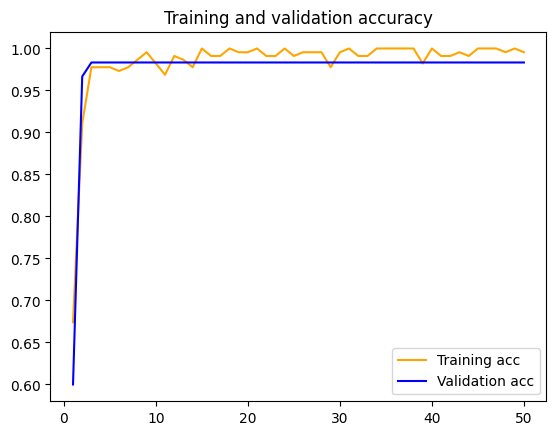

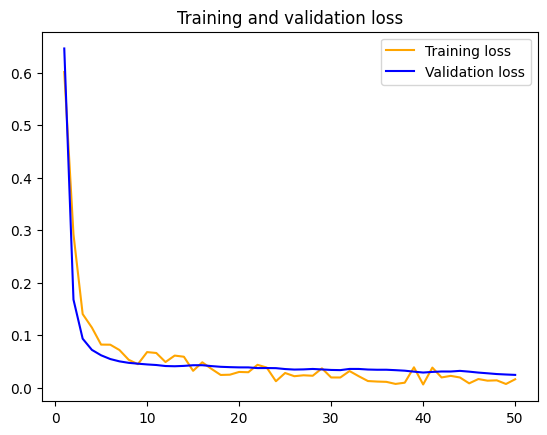

In [ ]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Callbacks
cb = [EarlyStopping(monitor = 'loss', mode = 'min', patience = 5, restore_best_weights = True)]

In [ ]:
import datetime as dt

In [ ]:
# Compilation
CNN_mobilenet.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])

# Start of counting time
start = dt.datetime.now()

# Training and validation
CNN_mobilenet_history = CNN_mobilenet.fit(training_set, epochs = 50, validation_data = test_set, callbacks = cb)

# End of Time Counting
end = dt.datetime.now()
time_CNN_mobilenet = end - start
print ('\nTraining and validation time: ', time_CNN_mobilenet)

Epoch 1/50
7/7 [==============================] - 14s 2s/step - loss: 0.0309 - accuracy: 0.9955 - val_loss: 0.0295 - val_accuracy: 1.0000
Epoch 2/50
7/7 [==============================] - 9s 1s/step - loss: 0.0231 - accuracy: 1.0000 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 3/50
7/7 [==============================] - 9s 1s/step - loss: 0.0209 - accuracy: 0.9955 - val_loss: 0.0239 - val_accuracy: 0.9833
Epoch 4/50
7/7 [==============================] - 9s 1s/step - loss: 0.0306 - accuracy: 0.9777 - val_loss: 0.0222 - val_accuracy: 0.9833
Epoch 5/50
7/7 [==============================] - 9s 1s/step - loss: 0.0187 - accuracy: 0.9955 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 6/50
7/7 [==============================] - 9s 1s/step - loss: 0.0150 - accuracy: 0.9955 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 7/50
7/7 [==============================] - 10s 1s/step - loss: 0.0208 - accuracy: 0.9866 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 8/50
7/7 [=======================

In [ ]:
##################################
import numpy as np

# Generate predictions for test set
y_pred = model.predict_generator(test_set)

# Convert predicted probabilities to binary class labels
y_pred = np.argmax(y_pred, axis=1)

# Get true labels
y_true = test_set.classes

# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1score = f1_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1score)
####################################

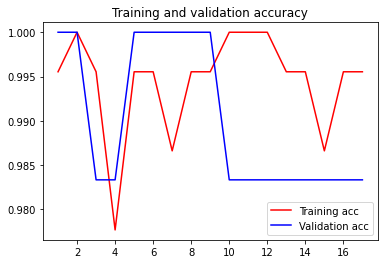

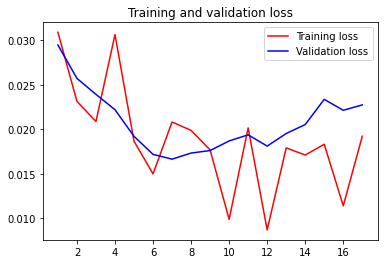

In [ ]:
acc = CNN_mobilenet_history.history['accuracy']
val_acc = CNN_mobilenet_history.history['val_accuracy']
loss = CNN_mobilenet_history.history['loss']
val_loss = CNN_mobilenet_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

InceptionV3 

In [ ]:
CNN_base_inc = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in CNN_base_inc.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(CNN_base_inc.output)

In [ ]:
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(1, activation='sigmoid')(x)

CNN_inc = Model(CNN_base_inc.input, x)

In [ ]:
# Compilation
CNN_inc.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Start of counting time
start = dt.datetime.now()

# Training and validation
CNN_inc_history = CNN_inc.fit(training_set, epochs = 50, validation_data = test_set)

# End of Time Counting
end = dt.datetime.now()
time_CNN_inc = end - start
print ('\nTraining and validation time is: ', time_CNN_inc)

Epoch 1/50


InvalidArgumentError: ignored

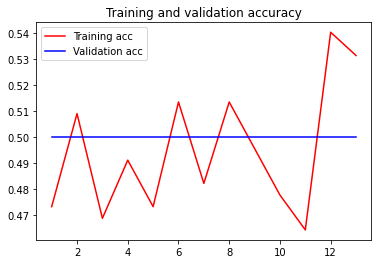

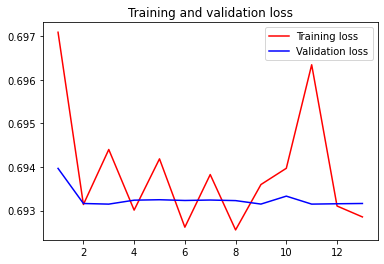

In [ ]:
acc = CNN_inc_history.history['accuracy']
val_acc = CNN_inc_history.history['val_accuracy']
loss = CNN_inc_history.history['loss']
val_loss = CNN_inc_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
score_inc = CNN_inc.evaluate(test_set)
print("Test Loss:", score_inc[0])
print("Test Accuracy:", score_inc[1])

ResNet18

Test 

In [ ]:
from keras.layers import Input, Dropout, Conv2D, MaxPooling2D, LSTM, TimeDistributed, Flatten, Dense, BatchNormalization
from keras.models import Model

# Input layer
inputs = Input(shape=(224, 224, 3))

# CNN layer
x = Conv2D(16, (2, 2), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = (Dropout(0.2))(x)

x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = (Dropout(0.2))(x)

x = Conv2D(64, (2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = (Dropout(0.2))(x)


# LSTM layer
x = TimeDistributed(Flatten())(x)
x = LSTM(128)(x)
x = (Dropout(0.2))(x)

# Fully connected layer
x = Dense(128, activation='relu')(x)
x = (Dropout(0.2))(x)
x = Dense(64, activation='relu')(x)
x = (Dropout(0.2))(x)
x = Dense(2, activation='softmax')(x)

# Create model
model = Model(inputs, x)
model.summary()


In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
import time

# Start the timer
start_time = time.time()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
#history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10)
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

# End the timer and calculate the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))


Epoch 1/50
7/7 [==============================] - 94s 11s/step - loss: 0.6784 - accuracy: 0.5982 - val_loss: 0.6940 - val_accuracy: 0.5167
Epoch 2/50
7/7 [==============================] - 13s 2s/step - loss: 0.5675 - accuracy: 0.7188 - val_loss: 0.6773 - val_accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - 12s 2s/step - loss: 0.4275 - accuracy: 0.8304 - val_loss: 0.6734 - val_accuracy: 0.5333
Epoch 4/50
7/7 [==============================] - 13s 2s/step - loss: 0.2971 - accuracy: 0.8973 - val_loss: 0.6736 - val_accuracy: 0.5333
Epoch 5/50
7/7 [==============================] - 12s 2s/step - loss: 0.3243 - accuracy: 0.8795 - val_loss: 0.6857 - val_accuracy: 0.5000
Epoch 6/50
7/7 [==============================] - 14s 2s/step - loss: 0.2548 - accuracy: 0.8929 - val_loss: 0.6879 - val_accuracy: 0.5000
Epoch 7/50
7/7 [==============================] - 14s 2s/step - loss: 0.1840 - accuracy: 0.9375 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 8/50
7/7 [=================

In [ ]:
##################################
import numpy as np

# Generate predictions for test set
y_pred = model.predict(test_set)

# Convert predicted probabilities to binary class labels
y_pred = np.argmax(y_pred, axis=1)

# Get true labels
y_true = test_set.classes

# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1score = f1_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1score)
####################################

2/2 [==============================] - 3s 1s/step
Accuracy: 0.5
Precision: 0.5
Recall: 0.03333333333333333
F1-Score: 0.0625


In [ ]:
from tensorflow.keras.models import load_model

model.save('my_model.h5')



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

AttributeError: ignored

In [ ]:
acc = model.history['accuracy']
val_acc = model.history['val_accuracy']
loss = model.history['loss']
val_loss = model.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

TypeError: ignored

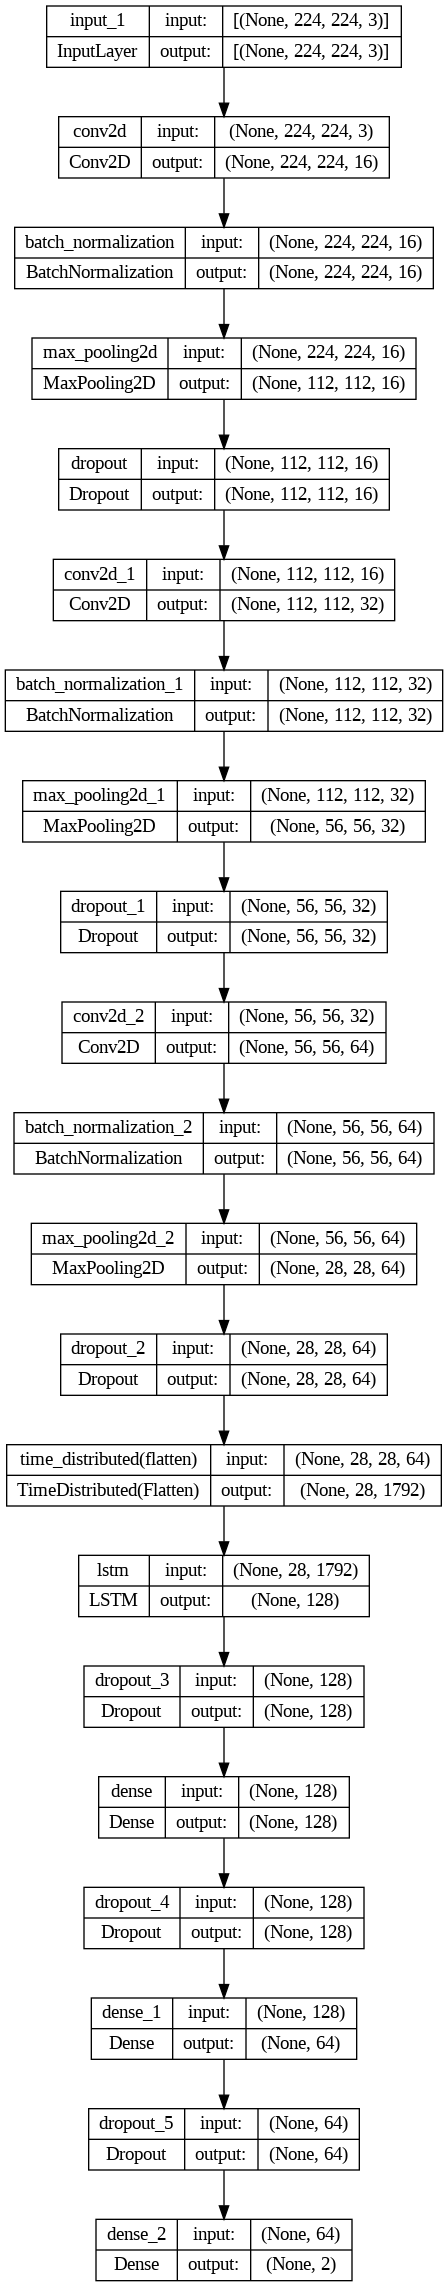

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = "hybrid.png", show_layer_names = True , show_shapes = True)

In [ ]:
from keras.layers import Input, Dropout, Conv2D, MaxPooling2D, LSTM, TimeDistributed, Flatten, Dense, BatchNormalization
from keras.models import Model

# Input layer
inputs = Input(shape=(224, 224, 3))

# CNN layer
x = Conv2D(16, (2, 2), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = (Dropout(0.2))(x)

x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = (Dropout(0.2))(x)

x = Conv2D(64, (2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = (Dropout(0.2))(x)


# LSTM layer
x = TimeDistributed(Flatten())(x)
x = LSTM(128)(x)
x = (Dropout(0.2))(x)

# Fully connected layer
x = Dense(128, activation='relu')(x)
x = (Dropout(0.2))(x)
x = Dense(64, activation='relu')(x)
x = (Dropout(0.2))(x)
x = Dense(2, activation='softmax')(x)

# Create model
model = Model(inputs, x)
model.summary()


TypeError: ignored

Xception

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import os.path
from pathlib import Path
import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, SpatialDropout2D
from tensorflow.keras import layers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from tensorflow.keras.preprocessing import image
from PIL import Image

In [ ]:
from keras.layers import Input, Dropout, Conv2D, MaxPooling2D, LSTM, TimeDistributed, Flatten, Dense, BatchNormalization
from keras.models import Model

In [ ]:
CNN_base_xcep = Xception(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
CNN_base_xcep.trainable = False

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
CNN_xcep = Sequential()
CNN_xcep.add(CNN_base_xcep)
CNN_xcep.add(GlobalAveragePooling2D())
CNN_xcep.add(Dense(128))
CNN_xcep.add(Dropout(0.1))
CNN_xcep.add(Dense(2, activation = 'sigmoid'))

CNN_xcep.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 128)               262272    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 2)                 258       
                                                                 
Total params: 21,124,010
Trainable params: 262,530
Non-trainable params: 20,861,480
____________________________________

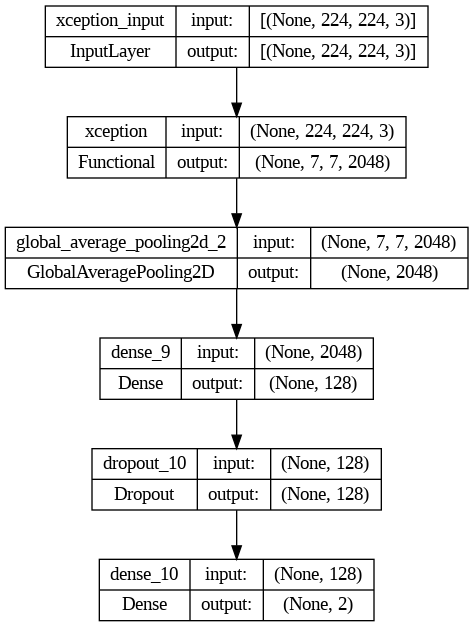

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(CNN_xcep, to_file = "xcepmod.png", show_layer_names = True , show_shapes = True)

In [ ]:
CNN_xcep.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
import time

# Start the timer
start_time = time.time()

# Compile the model
CNN_xcep.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
#history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10)
history = CNN_xcep.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

# End the timer and calculate the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))


Epoch 1/50
7/7 [==============================] - 22s 2s/step - loss: 0.3627 - accuracy: 0.7946 - val_loss: 0.1825 - val_accuracy: 0.9500
Epoch 2/50
7/7 [==============================] - 14s 2s/step - loss: 0.0743 - accuracy: 0.9777 - val_loss: 0.0289 - val_accuracy: 0.9833
Epoch 3/50
7/7 [==============================] - 12s 2s/step - loss: 0.0406 - accuracy: 0.9821 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 5/50
7/7 [==============================] - 13s 2s/step - loss: 0.0558 - accuracy: 0.9911 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 6/50
7/7 [==============================] - 13s 2s/step - loss: 0.0269 - accuracy: 0.9955 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 7/50
7/7 [==============================] - 14s 2s/step - loss: 0.0201 - accuracy: 0.9955 - val_loss: 0.0413 - val_accuracy: 0.9833
Epoch 8/50
7/7 [==============================] - 12s 2s/step - loss: 0.0169 - accuracy: 0.9911 - val_loss: 0.0671 - val_accuracy: 0.9500
Epoch 9/50
7/7 [==================

In [ ]:
##################################
import numpy as np

# Generate predictions for test set
y_pred = CNN_xcep.predict(test_set)

# Convert predicted probabilities to binary class labels
y_pred = np.argmax(y_pred, axis=1)

# Get true labels
y_true = test_set.classes

# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1score = f1_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1score)
####################################

2/2 [==============================] - 3s 830ms/step
Accuracy: 0.45
Precision: 0.45161290322580644
Recall: 0.4666666666666667
F1-Score: 0.45901639344262296


#test


In [ ]:
import torch
print(torch.__version__)

2.0.0+cu118


In [ ]:
import torch
import torchvision.models as models

# Download MobileNet model and print architecture diagram
mobilenet = models.mobilenet_v2(pretrained=True)
torch.save(mobilenet, 'mobilenet.pt')
print(mobilenet)

# Download VGG19 model and print architecture diagram
vgg19 = models.vgg19(pretrained=True)
torch.save(vgg19, 'vgg19.pt')
print(vgg19)

# Download Xception model and print architecture diagram
xception = models.xception(pretrained=True)
torch.save(xception, 'xception.pt')
print(xception)


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 153MB/s]
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:05<00:00, 111MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

AttributeError: ignored